# Chapter05. 회귀
###**01) 회귀 소개**

**회귀(Regression)**
- 통계학 관점: 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭

    Y= W1* X1 + W2 * X2 + ... + Wn * Xn

    - Y: 종속변수
    - X1, X2, X3, ...,Xn: 독립변수
    - W1, W2, W3, W4,..., Wn: 독립변수의 값에 영향을 미치는 회귀 계수 (Regression coefficients)
- 머신러닝 관점: 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

  (이때 독립변수는 피처에 해당되며 종속변수는 결정 값에 해당함)
- 회귀에서 가장 중요한 것: 회귀 계수

**회귀 유형 구분**
- 독립변수 개수
  - 1개: 단일 회귀
  - 여러 개: 다중 회귀
- 회귀 계수의 결합
  - 선형: 선형 회귀
  - 비선형: 비선형 회귀

**지도학습**
- 분류(Classification): 예측값이 카테고리와 같은 이산형 클래스 값으로 이뤄짐
- 회귀(Regression): 연속형 숫자 값으로 이뤄짐
  - 선형 회귀: 실제 값과 예측값의 차이(오류 제곱값)를 최소화하는 직선형 회귀선을 최적화하는 방식
    
    규제의 방법에 따라
    
    (*규제(Regularization): 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 패널티 값을 적용)
    1. 일반 선형 회귀
    2. 릿지(Ridge)
    3. 라쏘(Lasso)
    4. 엘라스틱넷(ElasticNet)
    5. 로지스틱 회귀(Logistic Regression)



###**02) 단순 선형 회귀를 통한 회귀 이해**
**단순 선형 회귀**
- 독립변수도 하나, 종속변수도 하나인 선형 회귀
- 예측값 Y'= w0 + w1*X로 계산됨
- 독립변수가 1개인 단순 선형 회귀에서는 기울기 w1과 절편 w0을 회귀 계수로 지칭함
- 이때 실제값은 예측값에서 실제 값만큼의 오류 값을 빼거나 더한값이 되며, 이를 최종 Y = w0 + w1*X + 오류값 으로 나타냄

**잔차**
- 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 회귀모델을 만든다는 것은 즉 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만든다는 의미와 동일함
- 오류 값은 +나 -가 될 수 있음 -> 즉, 이를 단순히 더하기만 해서는 오류 값이 줄어들 수도 있다는 의미를 내포함
- 오류합 계산 방법
  - 절댓값을 취해서 더하는 방식 (Mean Absolute Error)
  - 오류 값의 제곱을 구해서 더하는 방식 (RSS, Residual Sum of Square) *일반적으로 이 방법을 사용
- 머신러닝 기반 회귀의 핵심은 즉 이 RSS를 최소로 하는 w0, w1(회귀계수)를 찾는 것임
(*여기서 중요한 사항은 RSS는 회귀식의 독립변수 X, 종속변수 Y가 중심변수가 아니라 회귀 계수가 중심 변수 임을 인지하는 것이 중요하다!!)

**회귀에서의 RSS**

    RSS(w0, w1)  = 1/N SUM(y1 - (w0+w1*X))^2
- RSS: w변수로 구성되는 비용 함수
- 이때 비용함수를 손실함수 (Loss function)라고 부르기도 함
- 이 비용함수가 반환하는 값(오류값)을 지속해서 감소시키고, 최종적으로 더 이상 감소하지 않는 최소의 오류값을 구하는 것이 목표

###**03) 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**

**비용 함수가 최소가 되는 W 파라미터 찾기**
- W 파라미터 개수가 적다면 고차원 방정식으로 비용함수가 최소가 되는 W 변수 값을 도출 가능함
- W 파라미터 개수가 많다면 고차원 방정식을 동원하더라도 찾기가 어려움

  => 경사하강법 이용

**경사하강법**
- 점진적으로 반복적인 계산을 통하여 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
- 반복적으로 비용 함수의 반환값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해감
- 위에서 언급한 RSS(w0, w1)은 2개의 w파라미터를 가지므로 일반적인 미분을 적용하는 것이 아닌, w0와 w1 변수를 순차적으로 편미분을 수행하여 얻게 됨
- 이를 반복적으로 수행하며 w0, w1값을 업데이트 하면 비용한수 R(w)가 최소가 되는 w1, w0값을 찾을 수 있음
- 이때 이러한 값이 클 수 있기 때문에 보정 계수(n)을 곱하게 되는데, 이를 '학습률'이라고 함
- 경사하강법의 일반적 프로세스
  - step1: w0, w1을 임의의 값으로 설정하고 첫 비용함수의 값을 계산
  - step2: w0을 w1+n(2/N)SUMxi*(실제값i - 예측값i), w1을 w0 + n(2/N)SUM(실제값i - 예측값i)으로 업데이트한 후 다시 비용 함수의 값을 계산함
 - step3: 비용 함수가 감소하는 방향성으로 주어진 횟수만큼 step2를 반복하면서 w1과 w0를 계속 업데이트 해감

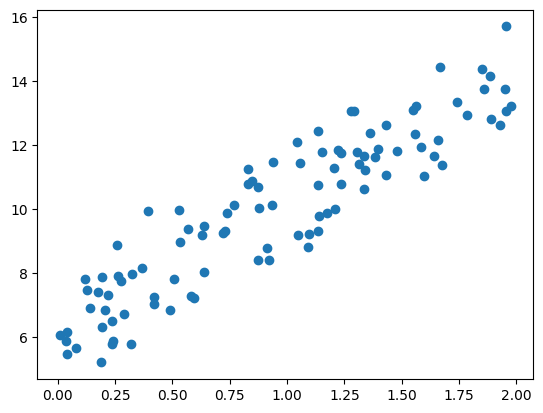

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y=4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4*X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [2]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [3]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N= len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))

  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
  # w0와 w1을 모두 0으로 초기화.
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [5]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y)
print("w1: {0:.3f} w0: {0:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X +w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 3.968 w0: 3.968
Gradient Descent Total Cost: 0.9924


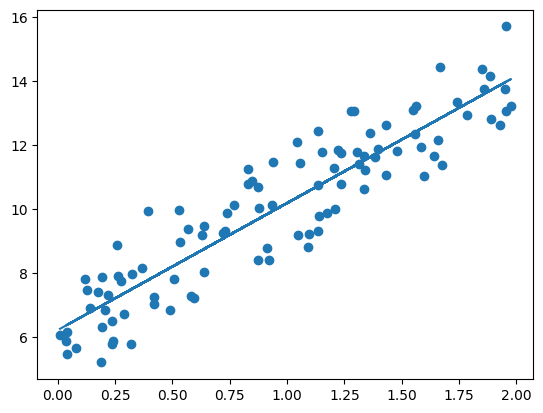

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1-w1_update
    w0 = w0-w0_update

  return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
y_pred = w1[0, 0]*X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


###**4) 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**
**LinearRegression 클래스 - Ordinary Least Square**
- 예측값과 실제 값의 RSS를 최소화해 OLS(Ordinary Least Square) 추정방식으로 구현한 클래스
- fit() 메서드로 X, Y 배열을 입력받으면 회귀 계수(Coefficients)인 W를 coef_속성에 저장함
- 입력 파라미터
  - fit_intercept: 불린 값으로, intercept값을 계산할 것인지 말지를 지정함
  - normalize: 불린값으로 fit_intercept가 False인 경우 이 파라미터가 무시되고 True이면 회귀를 수행하기 전 입력 데이터 세트를 정규화함
- 속성
  - coef_: fit()메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성을 의미. Shape는 (Target값 개수, 피처 개수)
  - intercept_: intercept값
- Ordinary Least Square 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음
  
    -> 만일 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 민감해지는데, 이를 다중 공선성(multi-colinearity)문제라고 함
    - 해결: 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용하거나 PCA를 통해 차원 축소를 수행하는 것도 고려해 볼 수 있음

In [9]:
# class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,  copy_X=True, n_jobs=1)

**회귀 평가 지표**
- 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심이 됨
- 실제값과 예측값의 차이를 그냥 더하는 것이 아닌 절댓값의 평균이나 제곱 등을 이용하여 평균값을 구함
  1. MAE: Mean Absolute Error이며 실제 값과 예측값의 차이를 절댓값으로 변환하여 평균한 것
  2. MSE: Mean Square Error이며 실제 값과 예측값의 차이를 제곱해 평균한 것
  3. RMSE: MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌움
  4. R^2: 분산 기반으로 예측 성능을 평가하며 실제 값의 분산 대비 예측값의 분산 비율을 지표로 함. 1에 가까울수록 예측 정확도가 높음
- 사이킷럽의 경우, RMSE를 제공하지 않기 때문에 RMSE를 구하기 위해선 MSE에 직접 루트를 씌워야 함
- 사이킷런의 API및 cross_val_score나 GridSearchCV에서 평가시 사용된느 scoring 파라미터의 적용값
  1. MAE: metrics.mean_absolute_error
  2. MSE: metrics.mean_squared_error
  3. RMSE: metrics.mean_squared_error를 그대로 사용하고 squared를 False로 지정
  4. MSLE: metrics.mean_squared_log_error
  5. R^2: metrics.r2_score


**LinearRegression을 이용한 보스턴 주택 가격 회귀 구현**

feature 설명
- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수 (강의 경계에 위치한 경우1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러 당 재산 세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유 주택 가격(중앙값)

데이터 세트 로드 및 DataFrame으로 변경

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드(원본데이터 직접 불러오)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

# boston 데이터세트 DataFrame 변환
bostonDF = pd.DataFrame(data, columns=columns)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼으로 DataFrame에 추가함.
bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


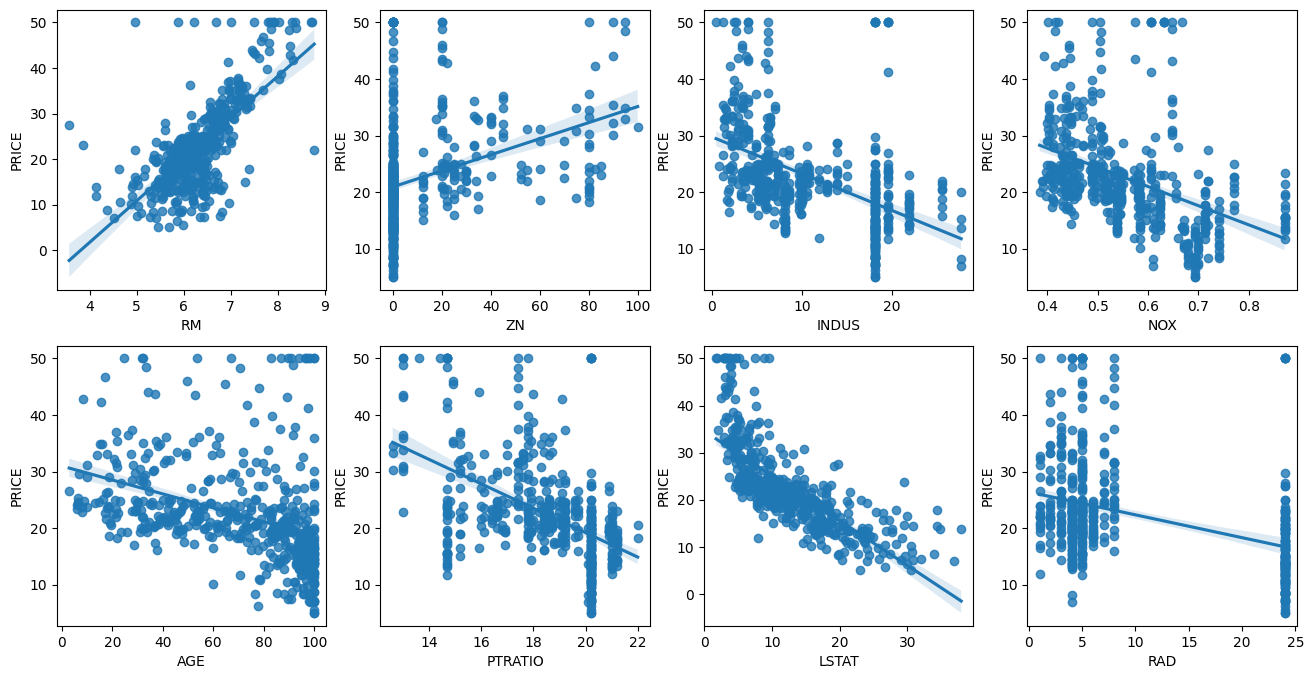

In [11]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4*2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE: {1:.3f}'. format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE: 4.159
Variance score: 0.757


In [13]:
print('절편값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [14]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
B,0.0
TAX,-0.0
AGE,0.0
CRIM,-0.1
LSTAT,-0.6


In [15]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print(' 5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print(' 5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
 5 folds의 평균 RMSE: 5.829


###**5) 다항 회귀와 과(대)적합/과소적합 이해**
**다항 회귀 이해**
- 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
- 선형회귀로 분류됨
- 사이킷런에선 다항 회귀를 위한 클래스를 명시적으로 제공하지 않아 비선형 함수를 선형 모델에 적용시키는 방법을 사용하여 구현함

In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2*2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처: \n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [17]:
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [18]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape:', model.coef_.shape)


3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipeline 객체로 Stramline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**다항 회귀를 이용한 과소적합 및 과적합 이해**
- 다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 확경에서는 오히려 예측 정확도가 떨어짐 = 과적합 문제 발생

다음은 다항회귀를 이용한 과소적합과 과적합의 문제를 잘 보여주는 예제를 확인해보자

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi *X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X =np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


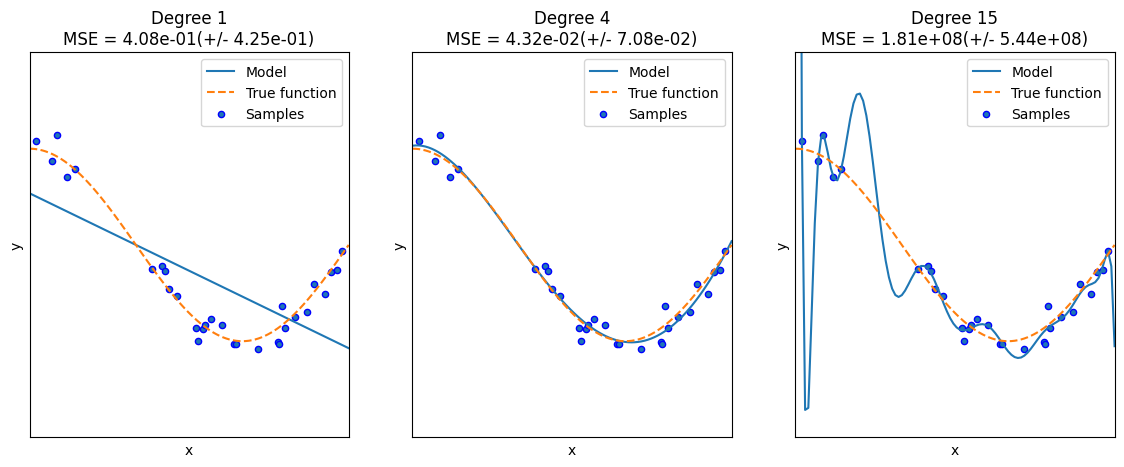

In [29]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree별로 Polynomial 반환합니다.
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)

  # 교차 검증으로 다항 회귀를 평가합니다.
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
  # 실제 값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

  plt.xlabel("x");plt.ylabel("y");plt.xlim((0, 1));plt.ylim((-2, 2)); plt.legend(loc="best")
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

각 곡선을 설명하자면 다음과 같다.
- 맨 왼쪽의 Degree1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 똑같다. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순하다. 예측곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소 적합 모델이라고 할 수 있다. 이때 MSE 값은 약 0.41이다.
- 가운데 Degree4 예측 곡선은 실제 데이터 세트와 유사한 모습니다. 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터 세트를 비교적 잘 반영하여 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 되었다. 이때 MSE값은 약 0.04로, 가장 뛰어난 예측 성능을 보인다.
- 맨 오른쪽 Degree 15 예측 곡선은 MSE값이 181238256.5642로 나올 정도로 이상한 오류값이 발생했다. 이때 예측곡선을 보면 데이터 세트의 변동 잡음 값이 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 상이한 예측 곡선이 형성된 것을 알 수 있다. 이는 학습데이터에 너무 치중하여 과적합이 나타난 모델이 되었다는 것을 알 수 있다.

**편향-분산 트레이드오프(Bias-Variance Trade off)**
- 머신러닝이 극복해야 할 가장 중요한 이슈 중 하나
- 일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향을 가짐
  
  -> 편향이 높으면 분산은 낮아져 과소적합이 발생, 분산이 높으면 편향이 낮아지는 과적합 발생
  - 편향이 너무 높으면 전체 오류는 높아짐
  - 편향을 점점 낮추면 분산이 높아지고 전체 오류가 낮아지며 전체 오류가 가장 낮은 '골디락스' 지점으로 감
  - 이 지점을 통과한 이후로부터는 분산이 지속적으로 높아지며 전체 오류 값은 오히려 증가하며 예측 성능이 다시 저하됨
- 편향과 분산이 서로 트레이드오프 관계라는 점을 인지하고, 오류 Cost값이 최대로 낮아지는 골디락스 지점의 모델을 구축하는 것이 가장 효율적임